In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas
import seaborn
import src
import os

In [23]:
def read_dataframe(kind):
    data = dict()
    for num_topics in range(25, 525, 25):
        projects = src.main.load_projects({"level": "method", "num_topics": num_topics})
        subdata = dict()
        for project in projects:
            ranks = src.main.read_ranks(project, kind)
            with open(os.path.join(project.full_path, 'ids.txt')) as f:
                ids = [x.strip() for x in f.readlines()]
            frms = [x for x,y,z in src.main.get_frms(ranks) if y in ids]
            mrr = src.utils.calculate_mrr(frms)
            subdata[project.printable_name + " "  + project.version] = mrr
        data[num_topics] = subdata
    return pandas.DataFrame(data)

In [24]:
lda = read_dataframe("release_lda")
vec = read_dataframe("release_vec")
vec_sums = read_dataframe("release_vec_sums")

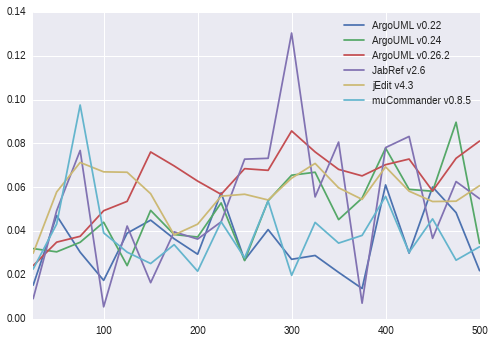

In [25]:
lda.T.plot()

In [26]:
lda

,25,50,75,100,125,150,175,200,225,250,275,300,325,350,375,400,425,450,475,500
ArgoUML v0.22,0.015347,0.047104,0.030375,0.017532,0.039060,0.045008,0.036516,0.029460,0.057488,0.026788,0.040698,0.027142,0.028884,0.021175,0.013813,0.061079,0.029967,0.060116,0.048439,0.021953
ArgoUML v0.24,0.032024,0.030546,0.034909,0.044053,0.024257,0.049460,0.038446,0.037306,0.052859,0.026566,0.053853,0.065500,0.066859,0.045244,0.055041,0.077855,0.059046,0.058195,0.089664,0.034382
ArgoUML v0.26.2,0.024228,0.034962,0.037628,0.049304,0.053574,0.076103,0.069746,0.062822,0.056770,0.068489,0.067728,0.085700,0.076126,0.068162,0.065197,0.070299,0.072876,0.058303,0.073212,0.081081
JabRef v2.6,0.009179,0.049357,0.076787,0.005463,0.042313,0.016478,0.039662,0.036370,0.044224,0.072825,0.073216,0.130358,0.055598,0.080619,0.007126,0.078107,0.083183,0.036708,0.062607,0.054799
jEdit v4.3,0.029922,0.057852,0.071324,0.067034,0.066857,0.057062,0.038260,0.043171,0.055933,0.056819,0.054198,0.064146,0.070884,0.059757,0.054470,0.069303,0.058222,0.053499,0.053647,0.060734
muCommander v0.8.5,0.022682,0.043208,0.097514,0.039195,0.030388,0.025211,0.033827,0.021695,0.044280,0.027801,0.053731,0.019819,0.043968,0.034525,0.038044,0.055850,0.030289,0.045591,0.026737,0.032859


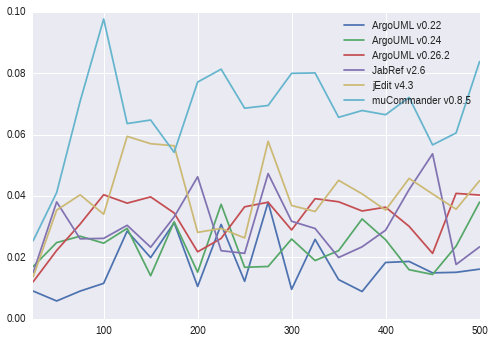

In [28]:
vec.T.plot()

In [29]:
vec

,25,50,75,100,125,150,175,200,225,250,275,300,325,350,375,400,425,450,475,500
ArgoUML v0.22,0.009035,0.005807,0.009029,0.011549,0.028587,0.019937,0.031318,0.010527,0.030750,0.012208,0.037997,0.009596,0.025880,0.012770,0.008886,0.018356,0.018685,0.014969,0.015148,0.016174
ArgoUML v0.24,0.017025,0.024831,0.026917,0.024638,0.029466,0.014029,0.031614,0.015181,0.037306,0.016787,0.017045,0.025993,0.018976,0.022204,0.032534,0.025763,0.015996,0.014449,0.023654,0.038016
ArgoUML v0.26.2,0.012066,0.022271,0.030876,0.040417,0.037686,0.039725,0.034483,0.021824,0.026189,0.036489,0.037983,0.028957,0.039147,0.038130,0.035130,0.036367,0.030138,0.021317,0.040863,0.040324
JabRef v2.6,0.015023,0.038091,0.026057,0.026205,0.030464,0.023328,0.033183,0.046265,0.022190,0.021331,0.047309,0.031776,0.029422,0.019969,0.023458,0.028872,0.042108,0.053760,0.017700,0.023437
jEdit v4.3,0.013698,0.035406,0.040394,0.034078,0.059457,0.057045,0.056395,0.028161,0.029447,0.026343,0.057836,0.036920,0.034965,0.045121,0.040715,0.035427,0.045747,0.040684,0.035700,0.044982
muCommander v0.8.5,0.025439,0.041129,0.070913,0.097701,0.063615,0.064770,0.054242,0.077134,0.081336,0.068620,0.069507,0.079985,0.080115,0.065650,0.067867,0.066495,0.072129,0.056667,0.060553,0.083819


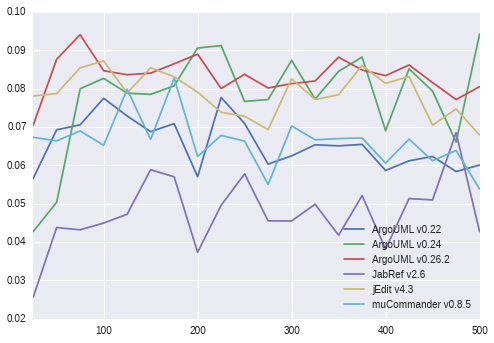

In [30]:
vec_sums.T.plot()

In [31]:
vec_sums

,25,50,75,100,125,150,175,200,225,250,275,300,325,350,375,400,425,450,475,500
ArgoUML v0.22,0.056582,0.069263,0.070570,0.077488,0.072858,0.068777,0.070873,0.057025,0.077687,0.070907,0.060325,0.062467,0.065362,0.065079,0.065469,0.058661,0.061178,0.062318,0.058383,0.060084
ArgoUML v0.24,0.042718,0.050394,0.079968,0.082675,0.078810,0.078508,0.080725,0.090578,0.091220,0.076662,0.077152,0.087371,0.077254,0.084507,0.088223,0.069051,0.085164,0.079333,0.066062,0.094173
ArgoUML v0.26.2,0.070424,0.087654,0.094074,0.084667,0.083617,0.084038,0.086465,0.088990,0.080030,0.083717,0.080164,0.081300,0.081987,0.088197,0.084856,0.083383,0.086157,0.081583,0.077151,0.080502
JabRef v2.6,0.025610,0.043785,0.043199,0.044958,0.047259,0.058860,0.057019,0.037341,0.049596,0.057785,0.045529,0.045498,0.049856,0.041788,0.052127,0.038187,0.051333,0.050989,0.068508,0.042750
jEdit v4.3,0.078070,0.078699,0.085441,0.087213,0.078848,0.085436,0.083083,0.079077,0.073824,0.072792,0.069315,0.082536,0.077181,0.078395,0.086040,0.081364,0.083164,0.070450,0.074702,0.067913
muCommander v0.8.5,0.067301,0.066380,0.068957,0.065227,0.079836,0.066752,0.082736,0.062305,0.067810,0.066314,0.055017,0.070269,0.066667,0.066977,0.067127,0.060592,0.066827,0.061198,0.063881,0.053812


In [32]:
df = pandas.DataFrame({"lda": lda.mean(), "vec": vec.mean(), "vec_sums": vec_sums.mean()})
df

,lda,vec,vec_sums
25,0.022230,0.015381,0.056784
50,0.043838,0.027923,0.066029
75,0.058089,0.034031,0.073702
100,0.037097,0.039098,0.073705
125,0.042741,0.041546,0.073538
150,0.044887,0.036472,0.073729
175,0.042743,0.040206,0.076817
200,0.038471,0.033182,0.069219
225,0.051926,0.037870,0.073361
250,0.046548,0.030296,0.071363


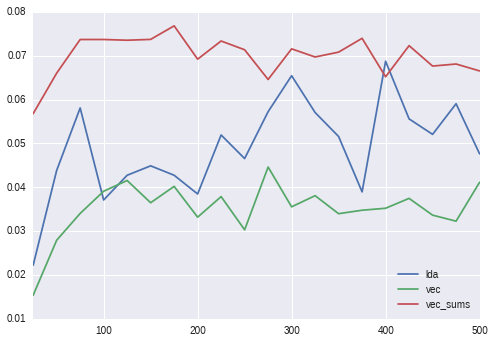

In [33]:
df.plot()

In [18]:
with open('icsme15era/tables/lda_mrr.tex', 'w') as f:
    lda.to_latex(f, float_format=lambda x: "%.4f" % x)
with open('icsme15era/tables/vec_mrr.tex', 'w') as f:
    vec.to_latex(f, float_format=lambda x: "%.4f" % x)
with open('icsme15era/tables/vec_sums_mrr.tex', 'w') as f:
    vec_sums.to_latex(f, float_format=lambda x: "%.4f" % x)


In [17]:
lda.to_latex(float_format=lambda x: "%.4f" % x)

u'\\begin{tabular}{lrrrrr}\n\\toprule\n{} &    100 &    200 &    300 &    400 &    500 \\\\\n\\midrule\nArgoUML v0.22      & 0.0175 & 0.0295 & 0.0271 & 0.0611 & 0.0220 \\\\\nArgoUML v0.24      & 0.0441 & 0.0373 & 0.0655 & 0.0779 & 0.0344 \\\\\nArgoUML v0.26.2    & 0.0493 & 0.0628 & 0.0857 & 0.0703 & 0.0811 \\\\\nJabRef v2.6        & 0.0055 & 0.0364 & 0.1304 & 0.0781 & 0.0548 \\\\\njEdit v4.3         & 0.0670 & 0.0432 & 0.0641 & 0.0693 & 0.0607 \\\\\nmuCommander v0.8.5 & 0.0392 & 0.0217 & 0.0198 & 0.0559 & 0.0329 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [42]:
times = pandas.read_csv('times100.csv', converters={
        "start": lambda x: pandas.Timestamp(x),
        "finish": lambda x: pandas.Timestamp(x)})
info = pandas.read_csv('subjectsizes.csv')

In [43]:
info

,system,queries,methods
0,argo22,91,12353
1,argo24,52,13064
2,argo26,209,16880
3,jabref,39,5357
4,jedit,150,7305
5,mu,92,8799


In [46]:
times["total"] = times.finish - times.start
del times["start"]
del times["finish"]

In [53]:
training = times[(times.type == "train")]
del training["type"]
training

,system,model,total
0,argo22,vec,00:00:02.070000
5,argo22,lda,00:00:58.207000
9,argo24,vec,00:00:02.267000
14,argo24,lda,00:01:05.507000
18,argo26,vec,00:00:02.736000
23,argo26,lda,00:01:21.176000
27,jabref,vec,00:00:01.280000
32,jabref,lda,00:00:29.504000
36,jedit,vec,00:00:01.519000
41,jedit,lda,00:00:36.701000


In [64]:
print(training[training.model == "lda"].to_latex())

\begin{tabular}{lllr}
\toprule
{} &  system & model &           total \\
\midrule
5  &  argo22 &   lda & 00:00:58.207000 \\
14 &  argo24 &   lda & 00:01:05.507000 \\
23 &  argo26 &   lda & 00:01:21.176000 \\
32 &  jabref &   lda & 00:00:29.504000 \\
41 &   jedit &   lda & 00:00:36.701000 \\
50 &      mu &   lda & 00:00:42.897000 \\
\bottomrule
\end{tabular}



In [82]:
vstimes = times[times.model == "vec_sums"]
vstimes = vstimes.merge(info, on="system")
vstimes.total / vstimes.queries

0   00:00:02.118835
1   00:00:01.824923
2   00:00:02.715062
3   00:00:00.720589
4   00:00:01.017060
5   00:00:01.056108
dtype: timedelta64[ns]

In [83]:
vectimes = times[times.model == "vec"]
vectimes = vectimes.merge(info, on="system")
vectimes.total / vectimes.queries

0    00:00:00.022747
1    00:00:00.001406
2    00:00:00.000967
3    00:00:00.200747
4    00:00:00.043596
5    00:00:00.000884
6    00:00:00.001769
7    00:00:00.213365
8    00:00:00.013090
9    00:00:00.001157
10   00:00:00.000555
11   00:00:00.286153
12   00:00:00.032820
13   00:00:00.000692
14   00:00:00.001051
15   00:00:00.089564
16   00:00:00.010126
17   00:00:00.000833
18   00:00:00.000360
19   00:00:00.122760
20   00:00:00.018434
21   00:00:00.000663
22   00:00:00.000706
23   00:00:00.145858
dtype: timedelta64[ns]

In [107]:
vectimes = times[times.model == "vec"].groupby(["system"]).sum()
del vectimes["model"]
del vectimes["type"]
vectimes['queries'] = info.groupby("system").sum()["queries"]

In [109]:
vectimes.total / vectimes.queries

system
argo22   00:00:00.225868
argo24   00:00:00.259615
argo26   00:00:00.300956
jabref   00:00:00.124128
jedit    00:00:00.134080
mu       00:00:00.165663
dtype: timedelta64[ns]

In [110]:
ldatimes = times[times.model == "lda"].groupby(["system"]).sum()
del ldatimes["model"]
del ldatimes["type"]
ldatimes['queries'] = info.groupby("system").sum()["queries"]
ldatimes.total / ldatimes.queries

system
argo22   00:00:00.943362
argo24   00:00:01.686980
argo26   00:00:00.744468
jabref   00:00:00.957000
jedit    00:00:00.405700
mu       00:00:00.685543
dtype: timedelta64[ns]